In [62]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
from scipy.special import boxcox1p

In [63]:
train = pd.read_csv('Train_Data.csv')
train.head()


,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [64]:
train.shape
test = pd.read_csv('Test_Data.csv')
test.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [65]:
test.shape

(318, 8)

In [66]:
train.columns

Index(['date', 'campaign', 'adgroup', 'ad', 'impressions', 'clicks', 'cost',
       'conversions', 'revenue'],
      dtype='object')

In [67]:
num_cols = train._get_numeric_data().columns
display(num_cols)
print()
print("Count:", len(num_cols))

Index(['impressions', 'clicks', 'cost', 'conversions', 'revenue'], dtype='object')


Count: 5


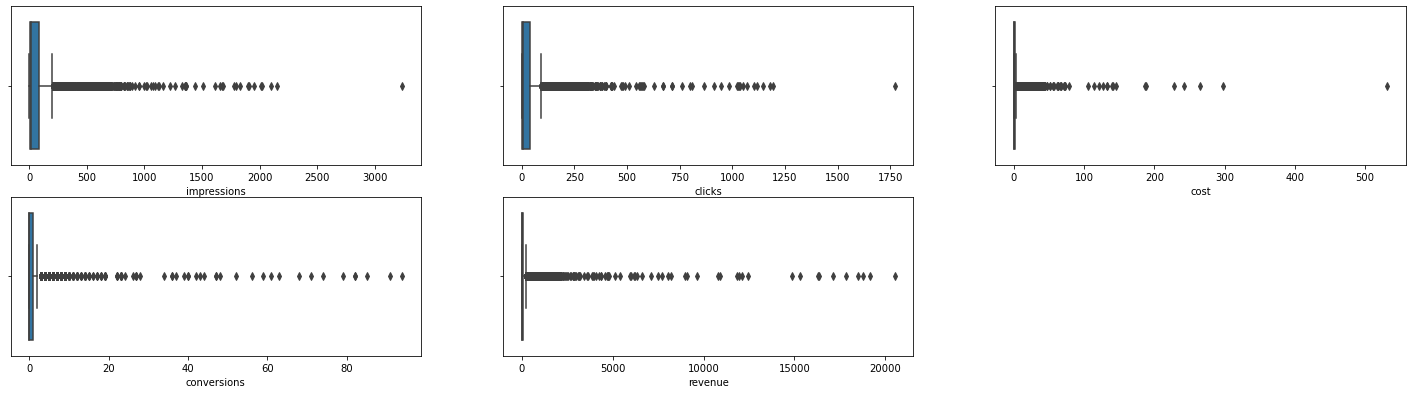

In [68]:
plt.figure(figsize = (25,45))
for i in enumerate(num_cols):
    plt.subplot(13, 3, i[0]+ 1)
    sns.boxplot(x = train[i[1]])
    plt.xlabel(i[1])

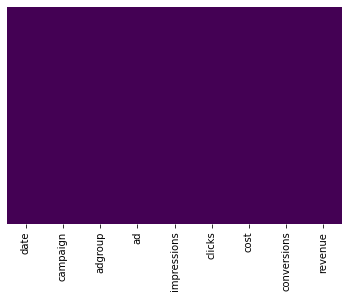

In [69]:
sns.heatmap(train.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')

In [70]:
Null_train = train.isnull().sum()
Null_train[Null_train > 0]

Series([], dtype: int64)

In [71]:
def view_null_data(data):
    return pd.DataFrame({"Data Type":data.dtypes, "Unique Count":data.apply(lambda x: x.nunique(),axis=0), 
                         "Null Count": data.isnull().sum() })


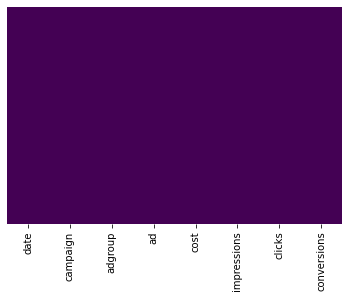

In [72]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [73]:
Null_test = test.isnull().sum()
Null_test[Null_test > 0]

Series([], dtype: int64)

In [74]:
corr_matrix = train.corr().style.background_gradient()
corr_matrix

,impressions,clicks,cost,conversions,revenue
impressions,1.000000,0.987514,0.682811,0.822149,0.759671
clicks,0.987514,1.000000,0.719925,0.856941,0.798282
cost,0.682811,0.719925,1.000000,0.672202,0.581662
conversions,0.822149,0.856941,0.672202,1.000000,0.964096
revenue,0.759671,0.798282,0.581662,0.964096,1.000000


In [75]:
def filter_correlation(data, limit):
    col = set()
    corr_matrix = data.corr() 
    for i in range(len(corr_matrix)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > limit:
                col_name = corr_matrix.columns[i]
                col.add(col_name)
    return col

In [76]:
high_corr_col = filter_correlation(train, 0.7)
high_corr_col

{'clicks', 'conversions', 'cost', 'revenue'}

In [77]:
train['revenue'] = np.log1p(train['revenue'])

In [78]:
X = train.drop(['revenue'], axis = 1)
col_to_use = list(X.columns)

y = train['revenue']
print(X.shape)
print(y.shape)

(4571, 8)
(4571,)


In [79]:
num_cols = [col for col in col_to_use if train[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in col_to_use if train[col].dtype == 'object']
num_cols

['impressions', 'clicks', 'cost', 'conversions']

In [80]:
cat_cols

['date', 'campaign', 'adgroup', 'ad']

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
num_processor = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', MinMaxScaler())
])
cat_processor = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse = False))
])
preprocessor = ColumnTransformer([
    ('num', num_processor, num_cols),
    ('cat', cat_processor, cat_cols)
])

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)

(3199, 8)
(3199,)


In [83]:
print(X_test.shape)
print(y_test.shape)

(1372, 8)
(1372,)


In [84]:
!pip install catboost
!pip install xgboost

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [114]:
model = LinearRegression()

In [115]:
model1 = Lasso()

In [116]:
model2 = Ridge()

In [117]:
model3 = DecisionTreeRegressor(max_leaf_nodes = 30, random_state = 42)

In [118]:
model4 = RandomForestRegressor(n_estimators = 500, random_state = 42)

In [259]:
model5 = GradientBoostingRegressor(learning_rate = 0.12, n_estimators = 165, random_state=0)

In [260]:
model6 = XGBRegressor(learning_rate = 0.1332, n_estimators = 165, random_state=0)

In [261]:
model7 = CatBoostRegressor(random_state=0,verbose=False, depth = 5, early_stopping_rounds=300, learning_rate= 0.01)

In [262]:
def build_model(model):
    clf = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    clf.fit(X_train, y_train)
    print(model)
    print("Train set score:", clf.score(X_train, y_train))
    print("Test set score:", clf.score(X_test, y_test))
    print("\n")
    print("Train set rmse:", mean_squared_error(y_train, clf.predict(X_train),squared=False))
    print("Test set rmse:", mean_squared_error(y_test, clf.predict(X_test),squared=False))
    print("\n")
    predictions = clf.predict(test)
    return predictions

In [263]:
predictions = build_model(model5) 

GradientBoostingRegressor(learning_rate=0.12, n_estimators=165, random_state=0)
Train set score: 0.9898617853779097
Test set score: 0.9826230718977299


Train set rmse: 0.27532388059100366
Test set rmse: 0.35360726797735814




C:\Users\Denebola Biswas\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [264]:
predictions

array([ 4.77701102e+00, -8.95667388e-05, -1.77339492e-03, -1.77339492e-03,
       -1.77339492e-03, -1.77339492e-03,  4.76682046e+00, -1.77339492e-03,
        4.78305483e+00, -1.77339492e-03,  5.87312664e+00, -8.95667388e-05,
       -1.77339492e-03,  5.59194226e+00, -1.77339492e-03,  4.77701102e+00,
       -8.95667388e-05,  4.79441544e+00, -8.95667388e-05,  4.77159763e+00,
       -1.77339492e-03,  5.32382405e-03, -1.77339492e-03,  6.05612941e+00,
       -1.77339492e-03, -1.77339492e-03,  6.23954744e+00,  4.78305483e+00,
       -1.77339492e-03, -1.77339492e-03,  5.93732940e+00, -1.77339492e-03,
        6.69191168e+00,  5.58589846e+00,  4.77159763e+00, -1.77339492e-03,
        4.79441544e+00, -8.95667388e-05, -1.77339492e-03, -1.77339492e-03,
       -1.77339492e-03, -8.95667388e-05, -1.77339492e-03,  5.32382405e-03,
        5.32382405e-03, -1.77339492e-03, -1.77339492e-03, -1.77339492e-03,
       -8.95667388e-05, -1.77339492e-03, -1.77339492e-03, -1.77339492e-03,
        1.12710473e-02,  

In [265]:
predictions = np.exp(predictions)

In [266]:
predictions

array([1.18748881e+02, 9.99910437e-01, 9.98228177e-01, 9.98228177e-01,
       9.98228177e-01, 9.98228177e-01, 1.17544908e+02, 9.98228177e-01,
       1.19468750e+02, 9.98228177e-01, 3.55358322e+02, 9.99910437e-01,
       9.98228177e-01, 2.68256137e+02, 9.98228177e-01, 1.18748881e+02,
       9.99910437e-01, 1.20833727e+02, 9.99910437e-01, 1.18107784e+02,
       9.98228177e-01, 1.00533802e+00, 9.98228177e-01, 4.26720575e+02,
       9.98228177e-01, 9.98228177e-01, 5.12626463e+02, 1.19468750e+02,
       9.98228177e-01, 9.98228177e-01, 3.78921629e+02, 9.98228177e-01,
       8.05861327e+02, 2.66639739e+02, 1.18107784e+02, 9.98228177e-01,
       1.20833727e+02, 9.99910437e-01, 9.98228177e-01, 9.98228177e-01,
       9.98228177e-01, 9.99910437e-01, 9.98228177e-01, 1.00533802e+00,
       1.00533802e+00, 9.98228177e-01, 9.98228177e-01, 9.98228177e-01,
       9.99910437e-01, 9.98228177e-01, 9.98228177e-01, 9.98228177e-01,
       1.01133480e+00, 2.68256137e+02, 1.32958141e+02, 1.17909078e+02,
      

In [267]:
output = pd.DataFrame({'revenue': predictions})
output.to_csv('submission.csv', index = False)

In [268]:
sub = pd.read_csv('submission.csv')
sub

,revenue
0,118.748881
1,0.999910
2,0.998228
3,0.998228
4,0.998228
...,...
313,0.998228
314,0.998228
315,0.999910
316,0.998228
